
## Bank Marketing Campaign
Portuguese bank is having a decrease in its revenue. The bank wants to be able to predict which clients are most likely to subscribe a term deposit so they can focus marketing efforts and resources on them and avoid wasting money and time on clients that will probably not subscribe. 

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading Data

In [4]:
#Let's load the data and take a first look to the first rows.

data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',sep=";")
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Tenemos 21 variables en el dataset

### Data Understanding

In [5]:
print("The shape of the data is:" + str(data.shape))

The shape of the data is:(41188, 21)


Which means there are 41188 rows and 21 columns (features).

In [6]:
#Checking if there are null values and each feature's type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We can see that there are 11 categorical columns and 10 numerical columns (including integers and float data type). 
Our target variable is called 'y' and is also a categorical column.





In [7]:
#Checking numerical parameters statistics:

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Checking for missing values

In [8]:
#Checking of there are any null values at any feature column.
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

As we can see there are no missing values so there will be no need to impute them.

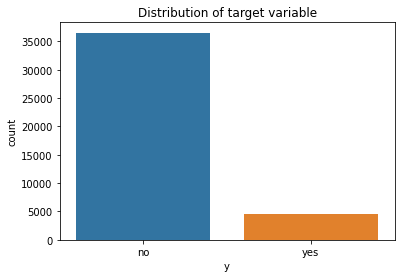

In [9]:
#Let's look at the distribution of our target variable to see if this is an unbalanced data.
sns.countplot(x=data['y'], data=data)
plt.title('Distribution of target variable')
plt.show()

This is un imbalanced data because most of the data belongs to 'No' class (Blue).

## Exploratory Data Analysis

In [10]:
#We will separate our prediction target from our features.

target = data.y
features = data.drop('y', axis=1)

In [11]:
#Let's check which are the features with categories (object type) in our training set

str_cols = features.select_dtypes('object').columns
num_cols = features.select_dtypes(['int', 'float']).columns

In [12]:
str_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [13]:
#Let's check the categories in each of those features

def countplot_features(feature):
    fig = plt.figure(figsize=(15,10))
    plot=sns.countplot(x=feature,data=features)
    plt.show()

In [14]:
def countplot_targetvsfeature(feature,y):
    fig = plt.figure(figsize=(15,10))
    plot=sns.countplot(x=feature,data=features,hue=y)
    plt.show()

**1. Job**

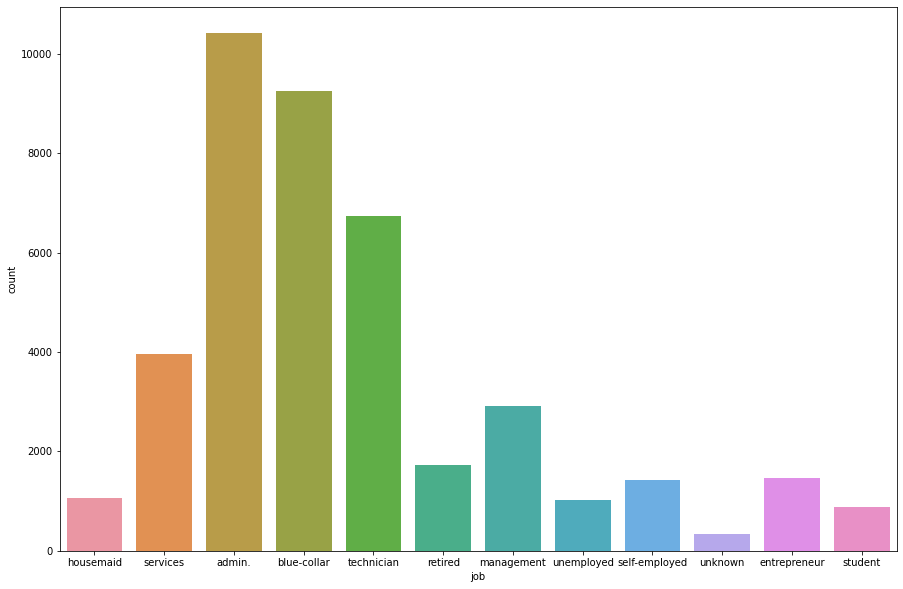

In [17]:
countplot_features('job')


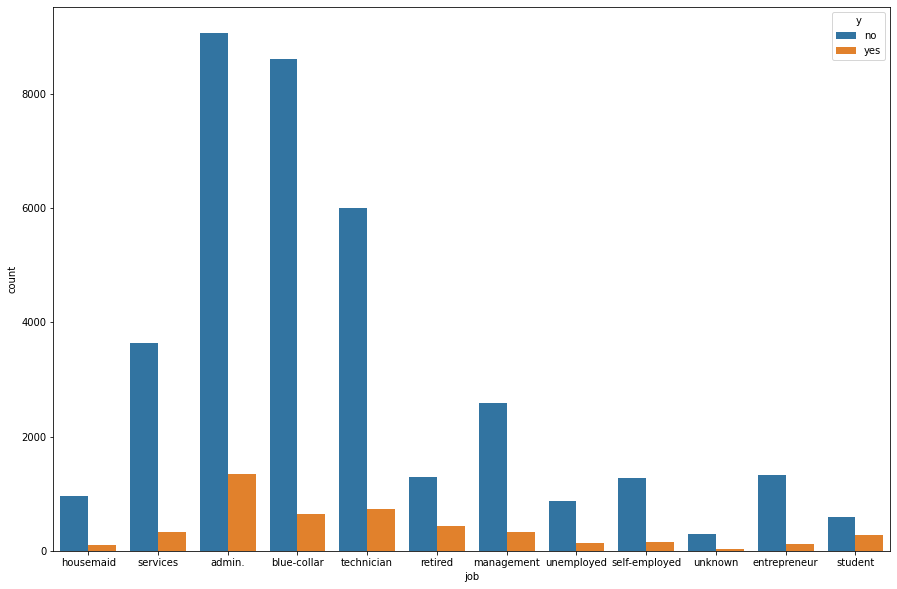

In [16]:
countplot_targetvsfeature('job', target)

**2. Marital**

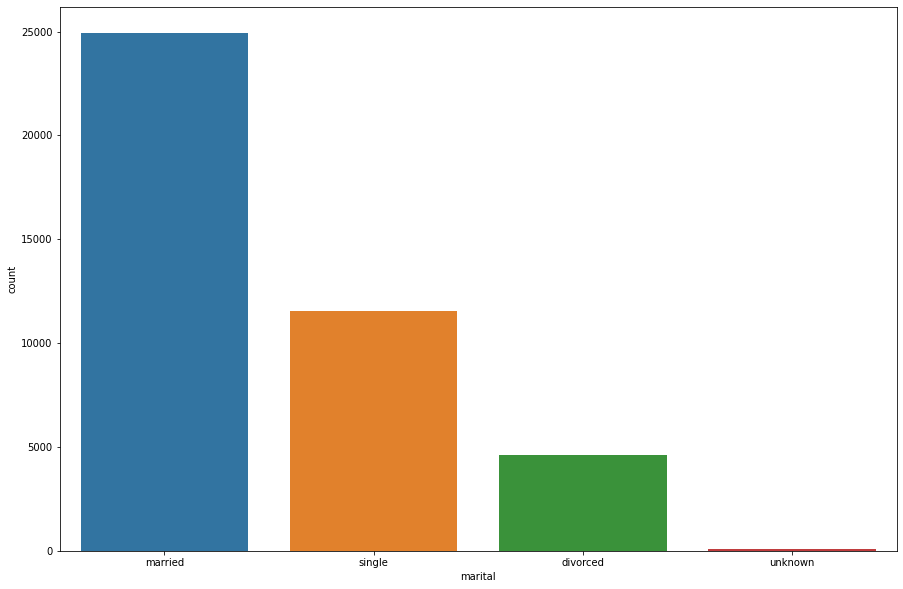

In [18]:
countplot_features('marital')

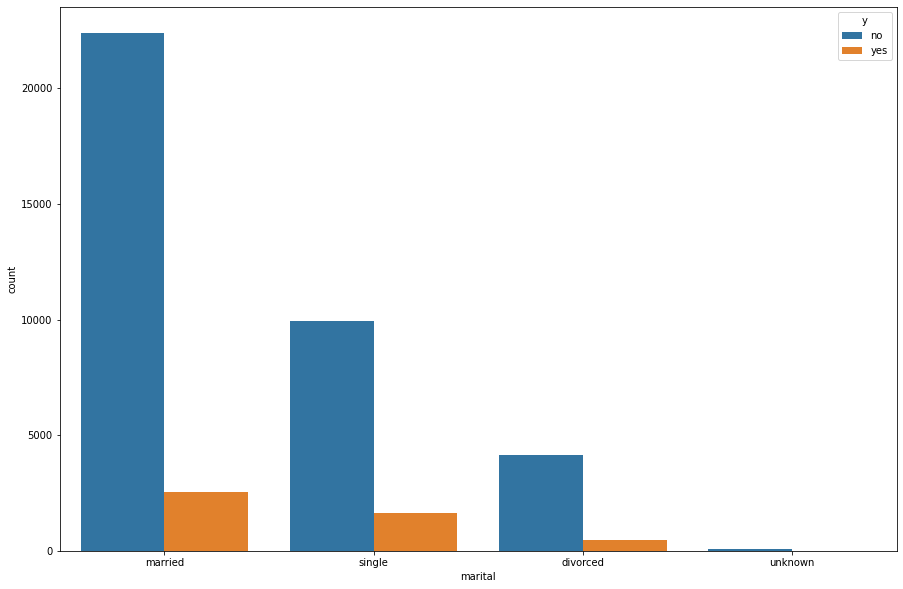

In [19]:
countplot_targetvsfeature('marital', target)

**3. Education**

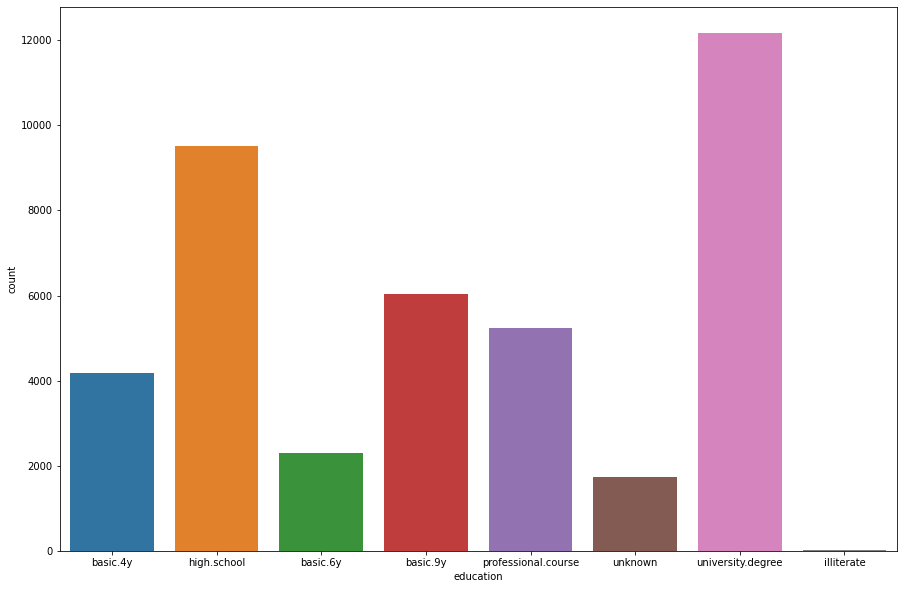

In [21]:
countplot_features('education')

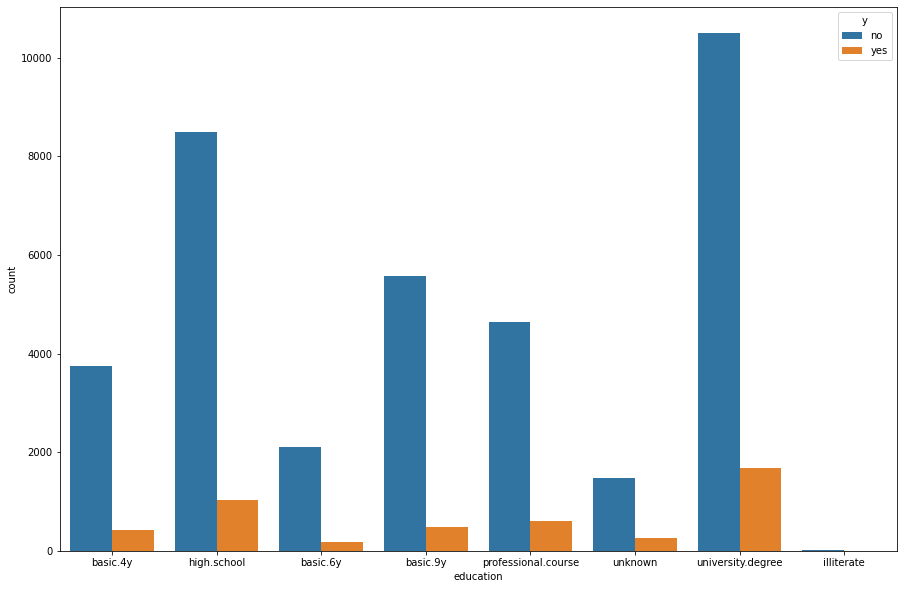

In [22]:
countplot_targetvsfeature('education', target)

**4. Default**

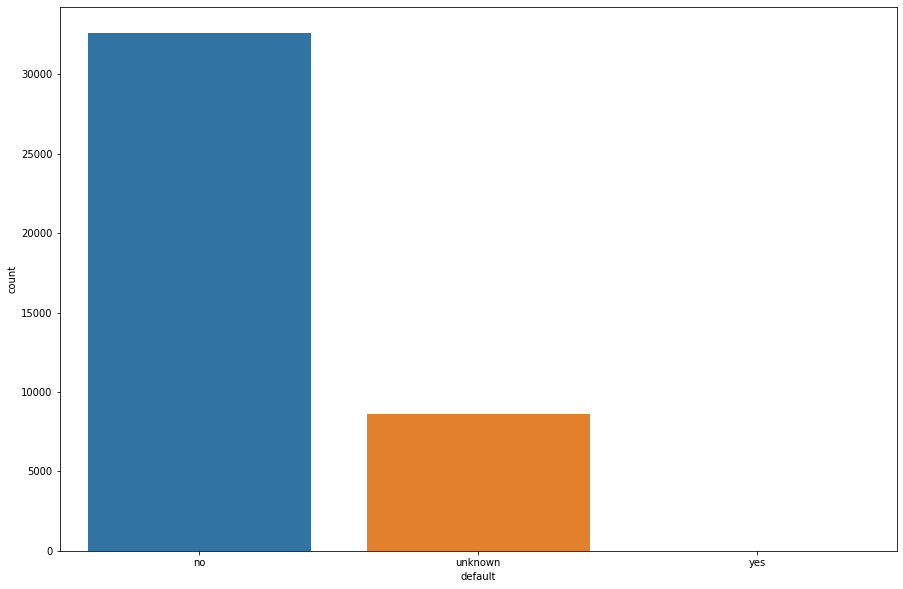

In [23]:
countplot_features('default')

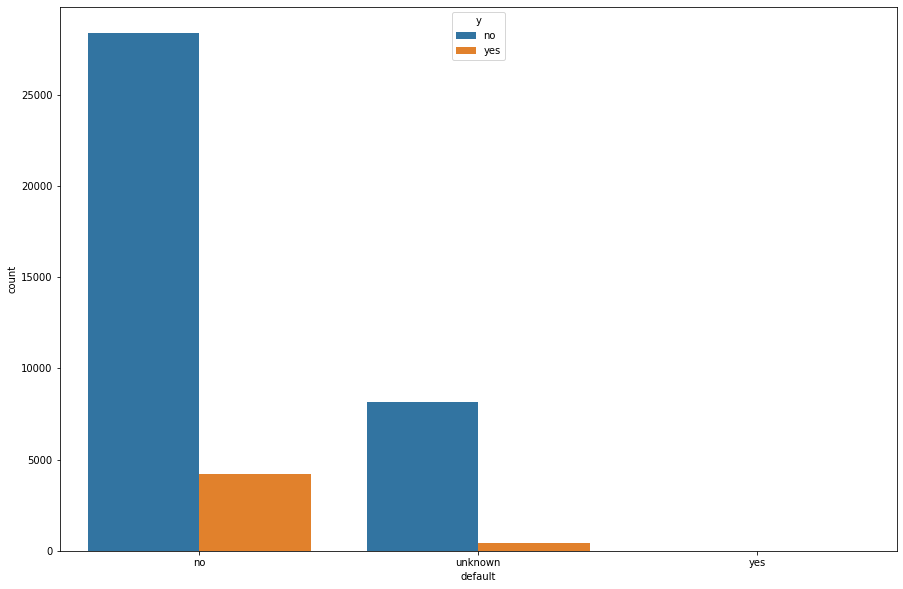

In [24]:
countplot_targetvsfeature('default', target)


**5. Housing**


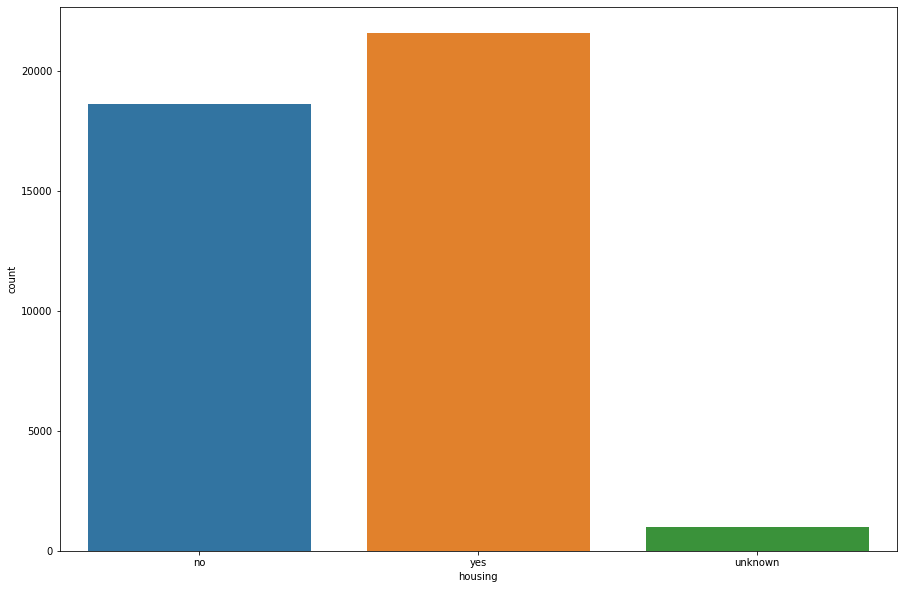

In [25]:
countplot_features('housing')

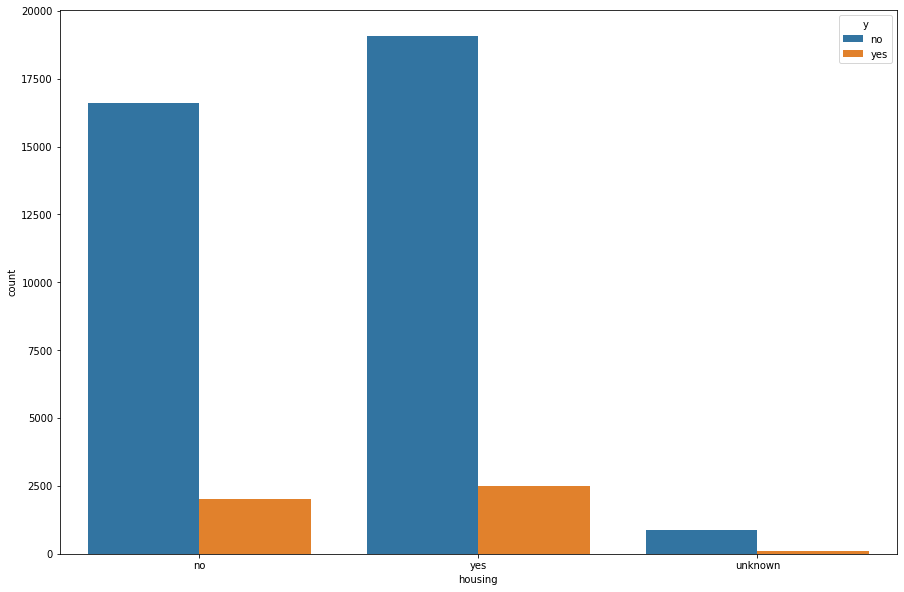

In [26]:
countplot_targetvsfeature('housing', target)

**6. Loan**

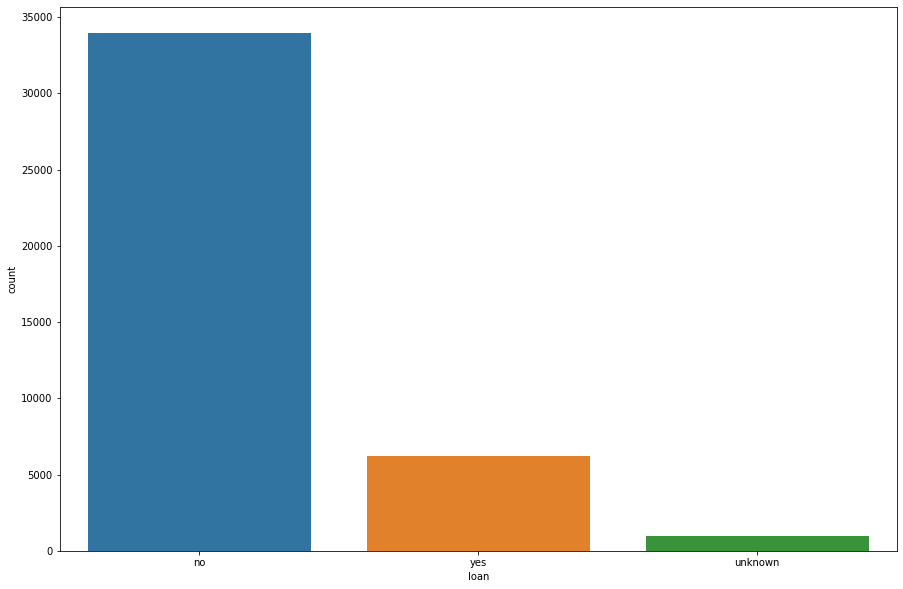

In [27]:
countplot_features('loan')

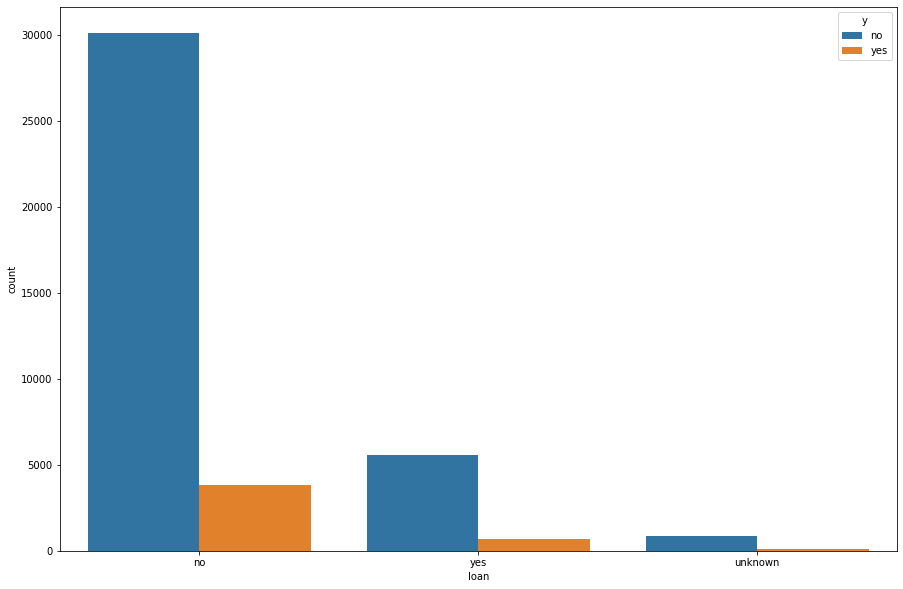

In [28]:
countplot_targetvsfeature('loan', target)

**7. Contact**

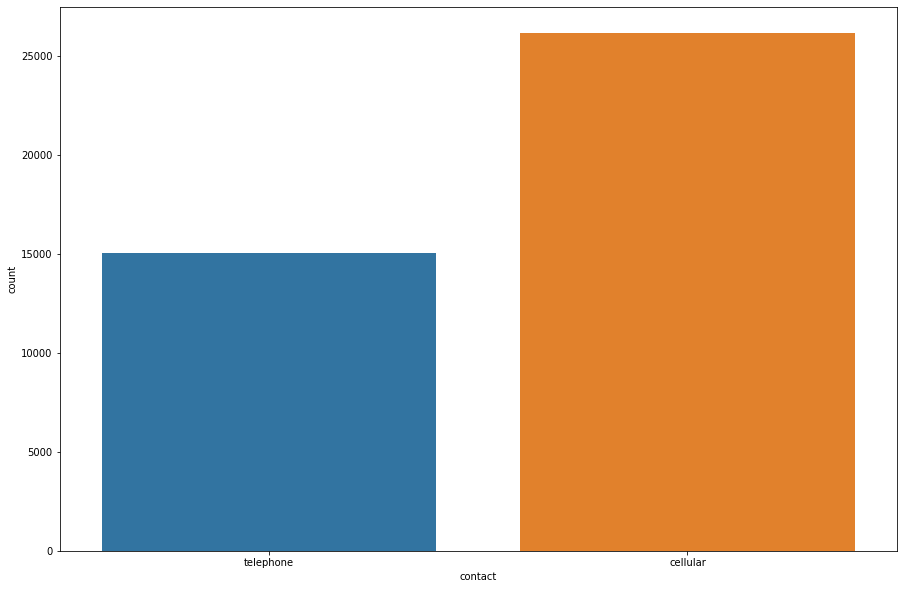

In [29]:
countplot_features('contact')

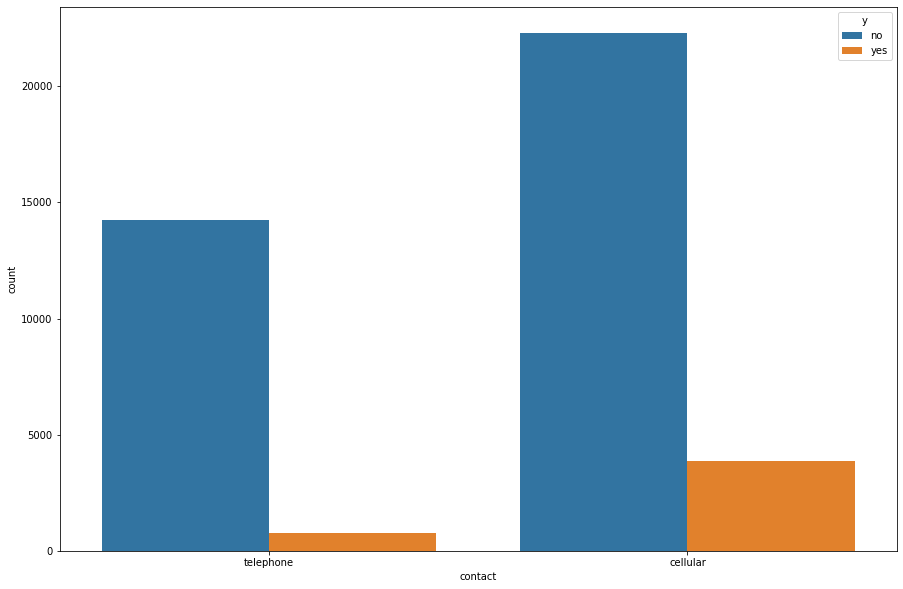

In [30]:
countplot_targetvsfeature('contact', target)

**8. Month**

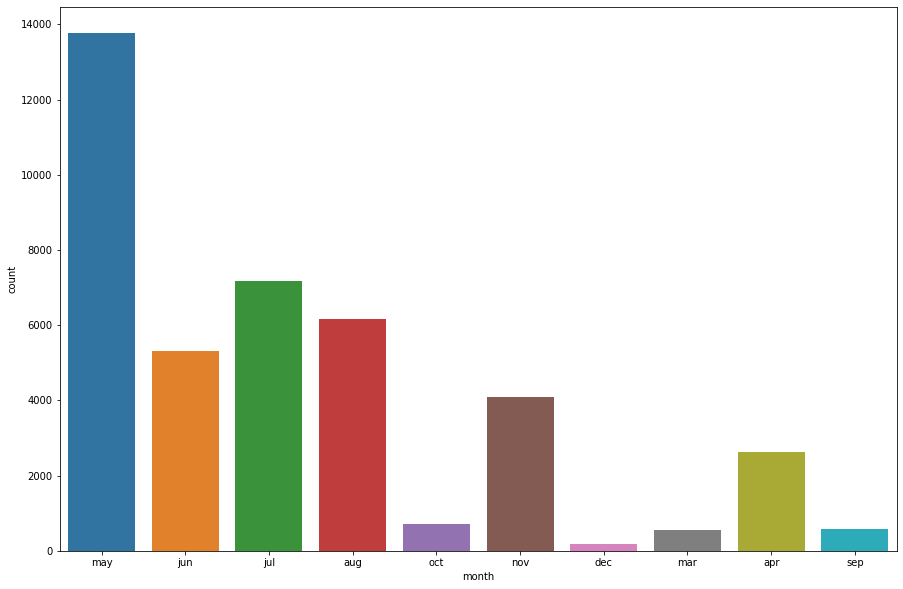

In [31]:
countplot_features('month')

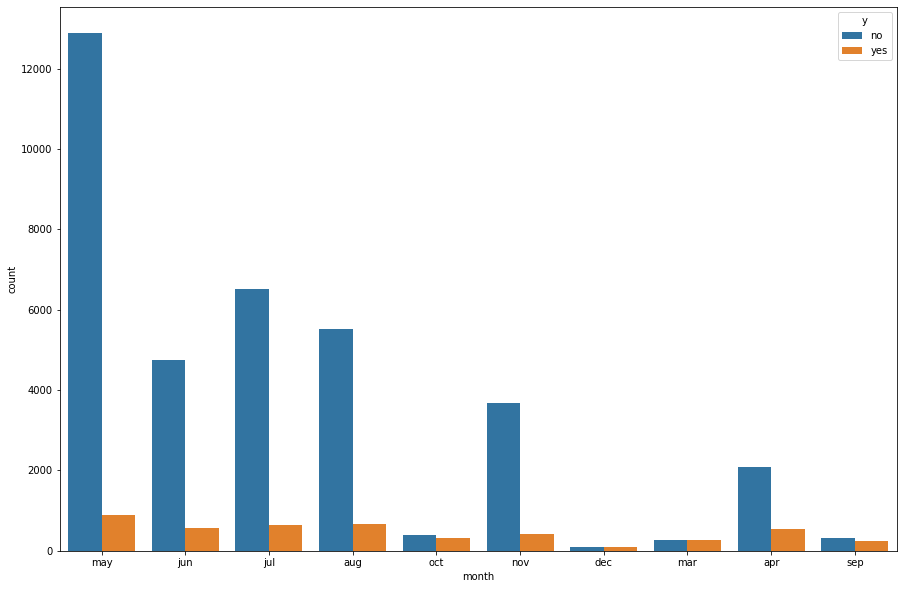

In [32]:
countplot_targetvsfeature('month', target)

**9. Day of the week**

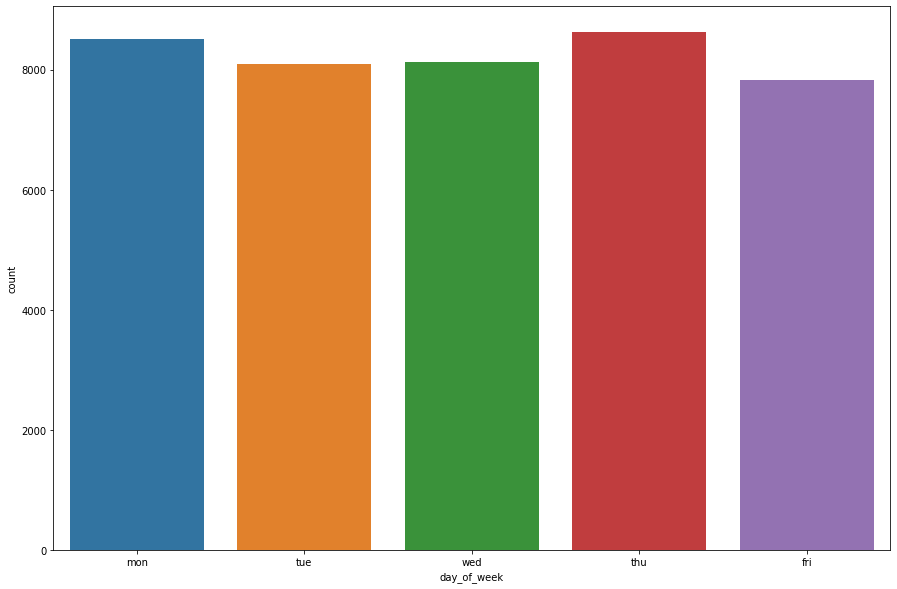

In [33]:
countplot_features('day_of_week')

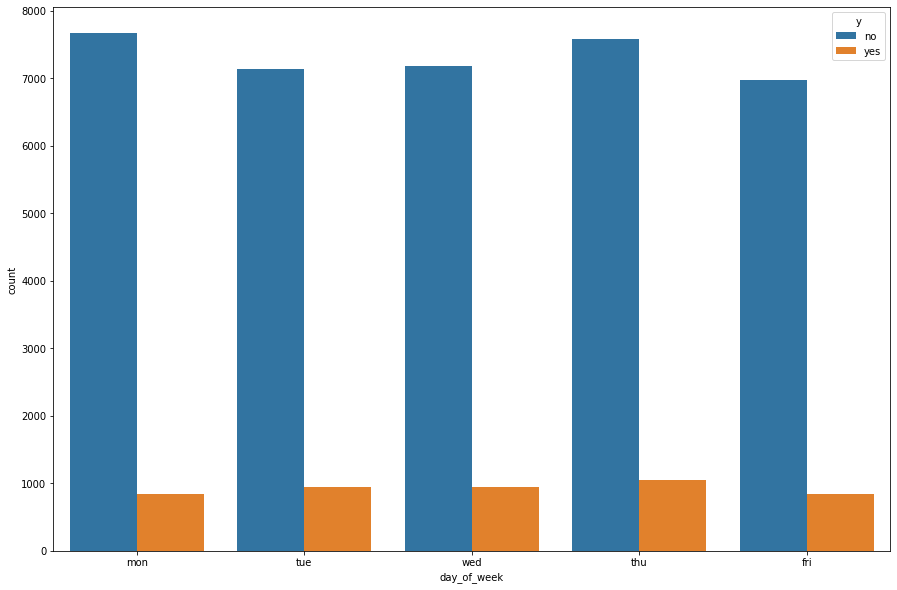

In [34]:
countplot_targetvsfeature('day_of_week', target)

**10. Previous Outcome**

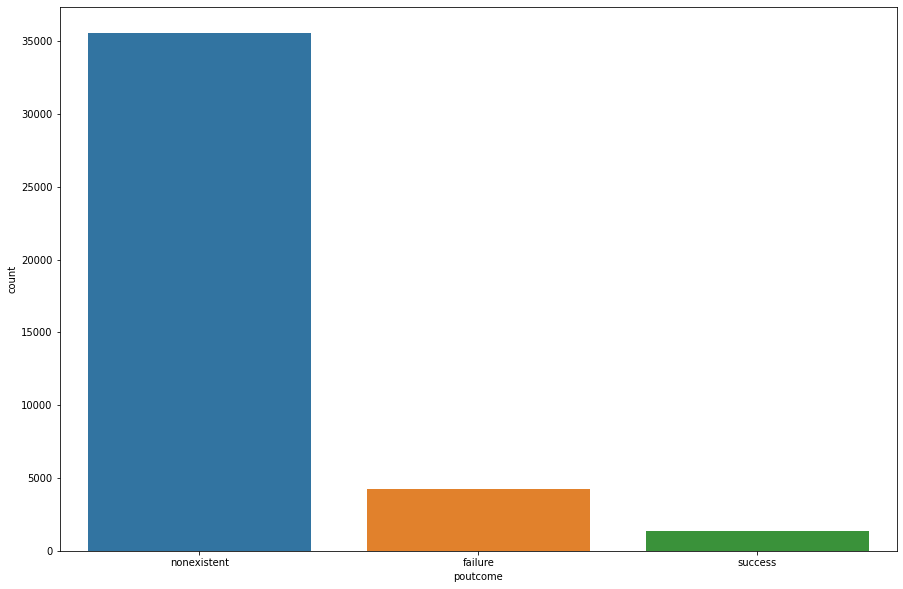

In [35]:
countplot_features('poutcome')

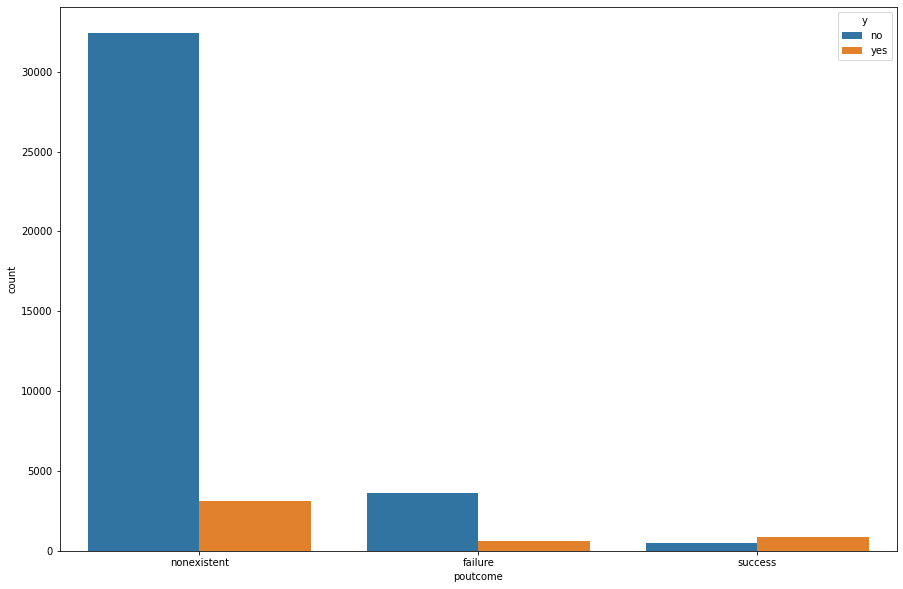

In [36]:
countplot_targetvsfeature('poutcome', target)

The graphic above shows us a lot of non existent previous outcome, which makes us think that those people never answered the phone in the previous campaign but this time some of them even accepted a term deposit.

### Numerical features

**1. Relation between Pdays vs Previous**

<AxesSubplot:xlabel='pdays', ylabel='previous'>

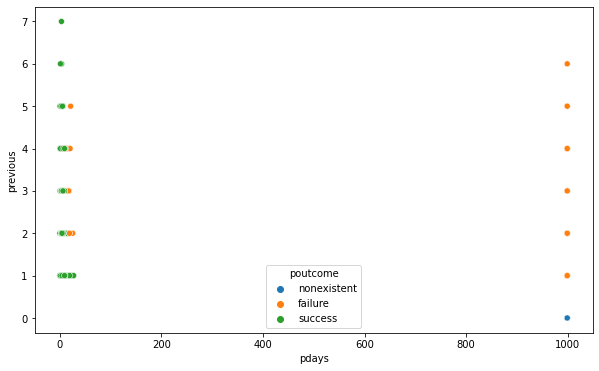

In [37]:
#Let's verify that there is coherence between the pdays variable 
#(#of days since last contacted----> if 999 then client was never contacted before) 
#and previous variable (# of times contacted in last campaign).

plt.figure(figsize=(10,6))
sns.scatterplot(x=features['pdays'], y=features['previous'], hue = features['poutcome'])

In this graph we can confirm that the non-existent values (blue dot) in Previous campaign is because they were never contacted before (0 previous & 999 pdays) so there can't be any previous outcome. 

Orange dots on the left tells us the negative outcomes we had with people contacted from 2-5 times.
Green dots on the left tells us the positive outcomes we had in the past with people contacted from 1 - 7 times.

However the orange dots on the right tells us the negative outcomes we had in the past with people contacted from 1-6 times, even tough the 'pdays' feature tells us those people were never contacted before (999 days).

To avoid confusions we will only use the 'previous' feature to know if someone was contacted before or not. Pdays feature will be eliminated during our data cleaning.


**2. Relation between duration of calls, number of times called in this campaign and its respective outcome (y)**

<AxesSubplot:xlabel='campaign', ylabel='duration'>

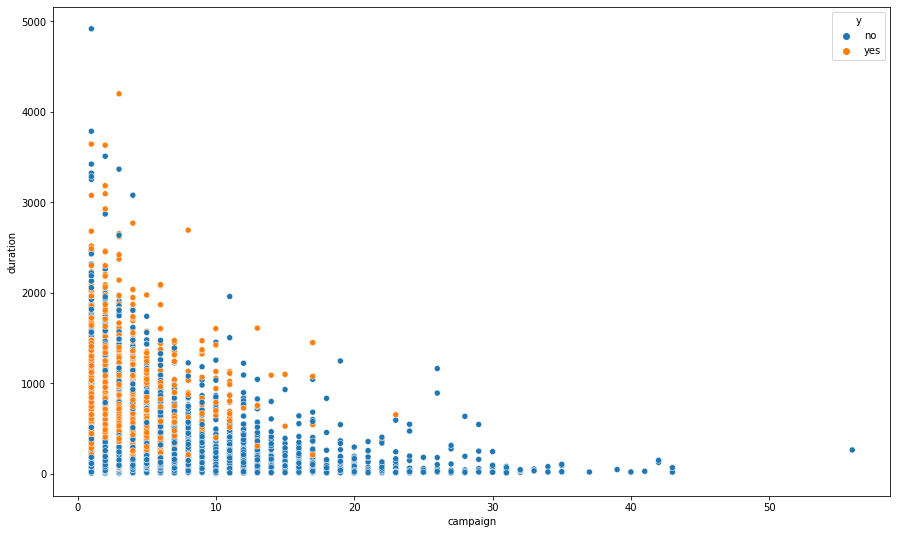

In [38]:
plt.figure(figsize=(15,9))
sns.scatterplot(x= features['campaign'], y= features['duration'], hue = target)

In the graphic above we can see that there is a negative relation between campaign (number of times client was called during this campaign) and duration of calls. The more the duration of calls, the less times that client was contacted. We could say people whom have been called more than 12 times, normally do not answer, or have a very short answer. 

**3. Relation between job, age and outcome of this campaign**

<AxesSubplot:xlabel='job', ylabel='age'>

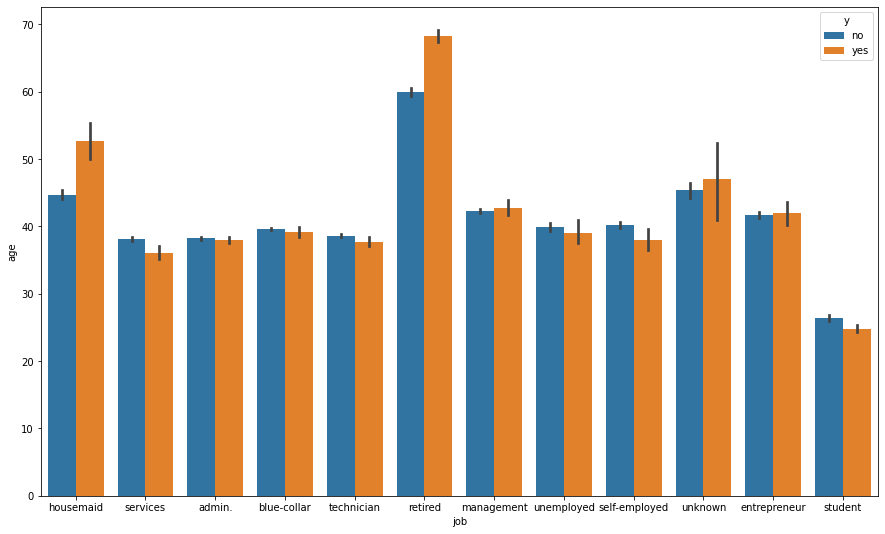

In [39]:
#Can we visualize what job and age is a more common client for a term deposit?

plt.figure(figsize=(15,9)) 
sns.barplot(x= features['job'], y= features['age'], hue= target)

We can see that there is a bigger difference between yes and no subscribers in retired people from a range of 65-70 years old, and housemaids in a range of 50-55 years old.

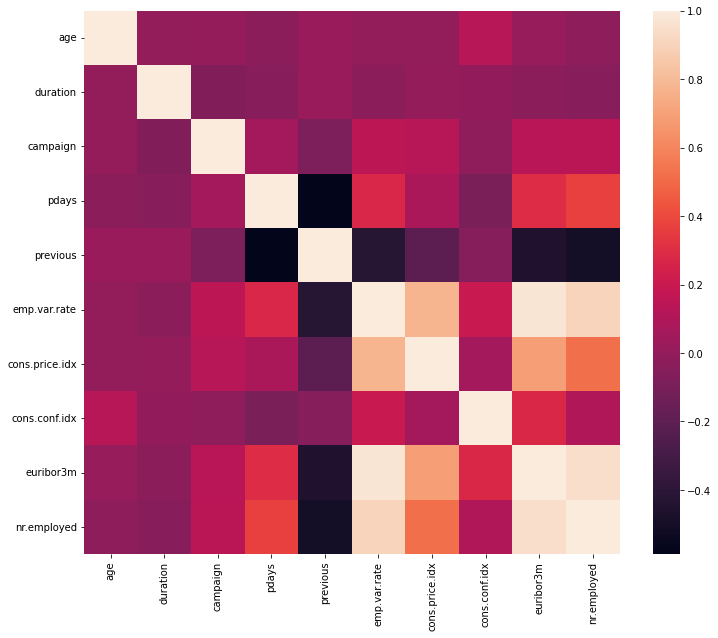

In [40]:
#We graph numerical data correlation to see if I find any other interesting relations. 

fig = plt.figure(figsize=(12,10))
cor_matrix = pd.concat([features[num_cols]], axis = 1).corr()
sns.heatmap(cor_matrix)
plt.show()

Number of employees rate is highly correlated with employee variation rate and bank interest rates.

Consumer price index is highly correlated with bank interest rate( higher the price index, higher the interest rate) and employee variation rate.

Number of contacts performed before this campaign has a highly negative correlation with employee variation rate and bank interest rates. (The higher the interest rates , the less contacts performed before this campaign).

# Data Cleaning and Preparation

We have finished visualizing features so we will use again our main data variable to start cleaning and preparing the data.

**1. Checking for outliers**

In [41]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


To have a more general view we used Describe function to see what numerical features have minimum or maximum numbers very far away from the mean value. We notice that age, duration and campaign are those 3 features we will look closer to search for outliers.

**Age**

In [42]:
stat1= data['age'].describe()
print(stat1)

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [43]:
IQR = stat1['75%']-stat1['25%']
upper = stat1['75%'] + 1.5*IQR
lower = stat1['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 69.5 and 9.5.


Text(0, 0.5, 'Age')

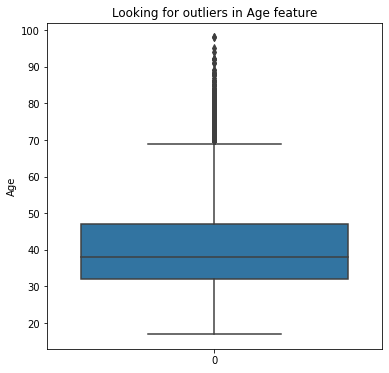

In [44]:
plt.figure(figsize=(6,6))
sns.boxplot(data=data['age'])
plt.title('Looking for outliers in Age feature')
plt.ylabel('Age')

As the minimum number is 17 there is no need to look for the outliers below 9.5

**Duration**

In [45]:
stat2= data['duration'].describe()
print(stat2)

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


In [46]:
IQR = stat2['75%']-stat2['25%']
upper = stat2['75%'] + 1.5*IQR
lower = stat2['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 644.5 and -223.5.


Text(0, 0.5, 'Duration')

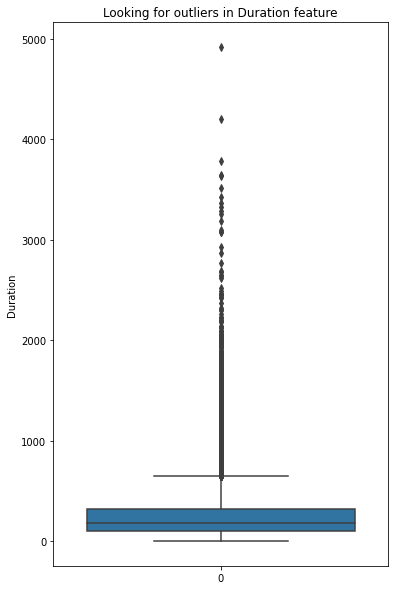

In [47]:
plt.figure(figsize=(6,10))
sns.boxplot(data=data['duration'])
plt.title('Looking for outliers in Duration feature')
plt.ylabel('Duration')

As the minimum number is 0 there is no need to look for outliers below -223.5

**Campaign**

In [48]:
stat3= data['campaign'].describe()
print(stat3)

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


In [49]:
IQR = stat3['75%']-stat3['25%']
upper = stat3['75%'] + 1.5*IQR
lower = stat3['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 6.0 and -2.0.


Text(0, 0.5, 'Campaign')

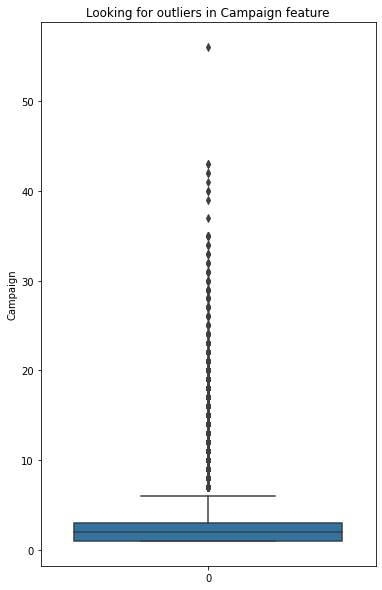

In [50]:
plt.figure(figsize=(6,10))
sns.boxplot(data=data['campaign'])
plt.title('Looking for outliers in Campaign feature')
plt.ylabel('Campaign')

As the minimun number is 1 there is no need to look for outliers below -2.

**2. Replacing 'unknown' values**

Let's use the most frequent value to replace each of the unknown values in categorical features.

In [52]:
def replace_with_frequent(df,col):
    frequent = df[col].value_counts().idxmax()
    print("The most frequent value is:", frequent)
    df[col].replace('unknown', frequent , inplace = True)
    print("Replacing unknown values with the most frequent value:", frequent)

In [53]:
#Replacing unknown values in categorical features.
print('Job:')
replace_with_frequent(data, "job")
print('-'*50)
print('Marital:')
replace_with_frequent(data, "marital")
print('-'*50)
print('Education:')
replace_with_frequent(data, "education")
print('-'*50)
print('Default:')
replace_with_frequent(data, "default")
print('-'*50)
print('Housing:')
replace_with_frequent(data, "housing")
print('-'*50)
print('Loan:')
replace_with_frequent(data, "loan")

Job:
The most frequent value is: admin.
Replacing unknown values with the most frequent value: admin.
--------------------------------------------------
Marital:
The most frequent value is: married
Replacing unknown values with the most frequent value: married
--------------------------------------------------
Education:
The most frequent value is: university.degree
Replacing unknown values with the most frequent value: university.degree
--------------------------------------------------
Default:
The most frequent value is: no
Replacing unknown values with the most frequent value: no
--------------------------------------------------
Housing:
The most frequent value is: yes
Replacing unknown values with the most frequent value: yes
--------------------------------------------------
Loan:
The most frequent value is: no
Replacing unknown values with the most frequent value: no


We saw in the Exploratory Data Analysis that 'contact', 'month', 'day_of_week' and 'poutcome' did not have unknown value so we are not replacing any value there.

In [54]:
#Verifying if unknown values were replaced


print("Job:", data.job.value_counts(),sep = '\n')
print("-"*50)
print("Marital status:", data.marital.value_counts(), sep = '\n')
print("-"*50)
print("Education:", data.education.value_counts(), sep = '\n')
print("-"*50)
print("Default credit:", data.default.value_counts(), sep = '\n')
print("-"*50)
print("Housing loan:", data.housing.value_counts(), sep = '\n')
print("-"*50)
print("Personal Loan:", data.loan.value_counts(), sep = '\n')
print("-"*50)
print("Contact method:", data.contact.value_counts(), sep = '\n')
print("-"*50)
print("Month:", data.month.value_counts(), sep = '\n')
print("-"*50)
print("Day_of_week:", data.day_of_week.value_counts(), sep = '\n')
print("-"*50)
print("Previous outcome:", data.poutcome.value_counts(), sep = '\n')

Job:
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64
--------------------------------------------------
Marital status:
married     25008
single      11568
divorced     4612
Name: marital, dtype: int64
--------------------------------------------------
Education:
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64
--------------------------------------------------
Default credit:
no     41185
yes        3
Name: default, dtype: int64
--------------------------------------------------
Housing loan:
yes    22566
no     18622
Name: housing, dtype: int64
----------------------------------

**3. Converting Age into categorical data**

In [55]:
#add a new column next to the age column for age groups.

age_groups = pd.cut(data['age'],bins=[10,20,30,40,50,60,70,80,90,100],
                    labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])

#inserting the new column
data.insert(1,'age_group',age_groups)

#dropping age column
data.drop('age',axis=1,inplace=True)

In [56]:
#Let's verify the change has taken place and visualize it
data.head(2)

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50-59,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,50-59,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**4. Grouping education categories 'basic.9y','basic.6y','basic4y' into 'middle_school'**

In [57]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    data.loc[data['education'] == i, 'education'] = "middle.school"

data['education'].value_counts()

university.degree      13899
middle.school          12513
high.school             9515
professional.course     5243
illiterate                18
Name: education, dtype: int64

In [58]:
data.head(2)

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50-59,housemaid,married,middle.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,50-59,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**5. Dropping pdays column**

As we mentioned in the Exploratory Data Analysis, because of the inconsistency in *pdays* vs *previous* and *poutcome* we will only use the *previous* feature to determine if a client was called before.

In [59]:
data.drop('pdays', axis=1, inplace= True)

**6. Removing duplicates**

In [60]:
#We will lokk at the shape of duplicates and then remove them but we want to keep the most recent one.

duplicated_data=data[data.duplicated(keep="last")]
print("Duplicated Data",duplicated_data.shape)


Duplicated Data (42, 20)


In [61]:
#Removing duplicates
data=data.drop_duplicates()
data.shape

(41146, 20)

**7. Converting target variable into binary**

In [62]:
#mapping into yes=1 and no=0
def target_to_binary(y):
    y.replace({"yes":1,"no":0},inplace=True)

In [63]:
target_to_binary(data['y'])

In [64]:
#veryfing result
data['y'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

**8. Encoding ordinal features**

**3. Education**

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['age_group'] = encoder.fit_transform(data['age_group'])
data['education'] = encoder.fit_transform(data['education'])

In [66]:
data.head()

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,housemaid,married,2,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,4,services,married,0,no,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,2,services,married,0,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,2,admin.,married,2,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,4,services,married,0,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


**9. Encoding categorical features that are not ordinal**

In [67]:
data = pd.get_dummies(data, columns = ['job', 'marital', 'default','housing', 'loan', 'contact', 'poutcome'])
data.head()

,age_group,education,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4,2,may,mon,261,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,1,0
1,4,0,may,mon,149,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,1,0
2,2,0,may,mon,226,1,0,1.1,93.994,-36.4,...,0,0,1,1,0,0,1,0,1,0
3,2,2,may,mon,151,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,1,0
4,4,0,may,mon,307,1,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,1,0,1,0


**10. Encoding month and day of the week**

In [68]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
data['month']= data['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
data['day_of_week']= data['day_of_week'].map(day_dict) 

We finished cleaning our data! You may scale your data now or add it to the pipeline before Logistic Regression.

Also, you may decide now if you want to select features, or drop any specific feature before separating teh target from the rest of the data.

**Pasos a seguir**

    Separate your target variable from the predictors

    Choose how to divide your data to evaluate the performance of your model

    Build a first Logistic Regression model with default hyperparameters.

    Hypertune your model to improve your results.

    Use the app.py to create a pipeline

    Save your final model in the 'models' folder.

    In your README file write a brief summary.

    Deliver your repo link.
    
